# Controlling figure aesthetics(美学)

Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
list(map(ord, "aesthetics"))  # ord函数返回对应的ASCII值

[97, 101, 115, 116, 104, 101, 116, 105, 99, 115]

**一个简单的函数来绘制一些偏移正弦波**

Define a simple a simple func to plot some offset sine waves, which will help see the different stylistic(风格的) params we can tweak(对...微调).

In [3]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * 0.5) * (7 - i) * flip)

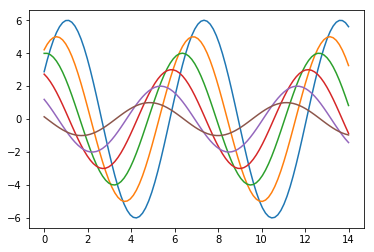

In [4]:
sinplot()

#### 使用默认的aesthetic parameters

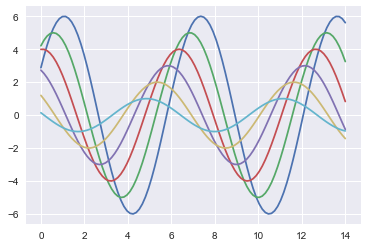

In [5]:
sns.set()  # set  aesthetic params in one step
sinplot()

#### 设置背景

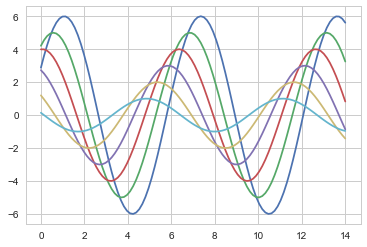

In [6]:
sns.set(style='whitegrid')
sinplot()

style:

        axes style params, string or dict
    
style可选参数有:

        darkgrid, whitegrid, dark, white, ticks

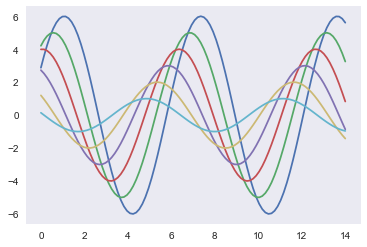

In [7]:
sns.set(style='dark')
sinplot()

#### 设置线条颜色

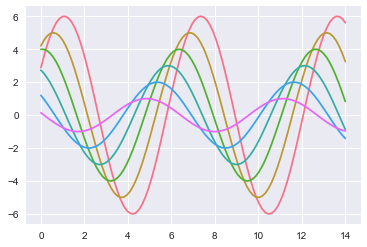

In [8]:
sns.set(palette='husl')
sinplot()

palette(调色板，颜料)可选参数有：
+ available seaborn palette names:
       deep, muted, bright, pastel, dark, colorblind

+ other options:
        hls, huls, any named matplotlib palette, list of colors

**Seaborn splits matplotlib params into two independent groups.**
1. sets the aesthetic style of the plot;
2. scales various elements of the figure so that it can be easily incorporated into(并入) different context.

+ To **control the style**, use the **`axes_style()`** (Return a parameter dict for the aesthetic style of the plots. This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.) and **`set_style()`** (Set the aesthetic style of the plots. This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.) funcs.


+ To **scale the plot**, use the **`plotting_context()`** (Return a parameter dict to scale elements of the figure. This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.) and **`set_context`** (Set the plotting context parameters. This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.) funcs.


> **`set_style()` and `set_context` can not be used in a `with` statement to temporarily change the context params.**

## Seaborn figure styles

There are five **preset seaborn themes**: *darkgrid* (default), *whitegrid*, *dark*, *white* and *ticks*. They are each suited to different applications and personal preferences.

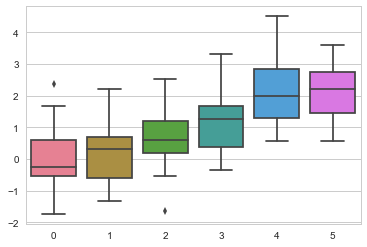

In [9]:
sns.set_style('whitegrid')
# Draw a box plot to show distributions with respect to categories
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

For many plots, (especially for setting like talks, where u primarily want to use figures to provide impressions of patterns in th data), the grid is less necessary.

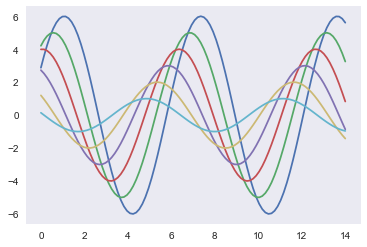

In [10]:
sns.set()
sns.set_style('dark')
sinplot()

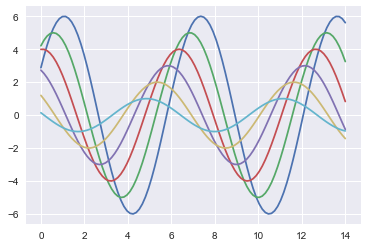

In [11]:
sns.set()
sns.set_style('darkgrid')
sinplot()

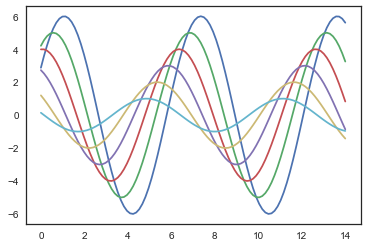

In [12]:
sns.set_style('white')
sinplot()

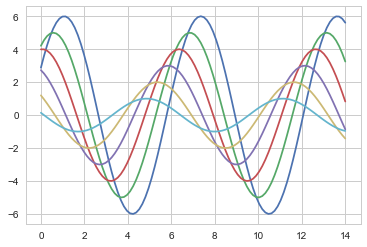

In [13]:
sns.set_style('whitegrid')
sinplot()

Sometimes u might want to give a little extra structure to the plots, which is where ticks come in handy(派得上用场):

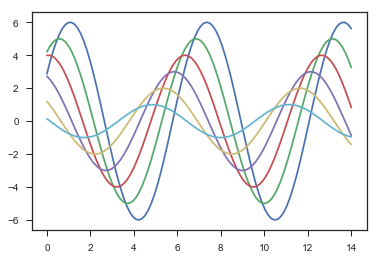

In [14]:
sns.set_style('ticks')
sinplot()

## Removing axes spines(脊椎，书脊)

**移除一些轴（默认移除上边和右边的轴）**

Both the *white* and *ticks* styles can benefit from removing the top and right axes spines, which are not needed. It's impossible to do this through the matplotlib params, but u can call the seaborn func **`despine()`** to remove them:

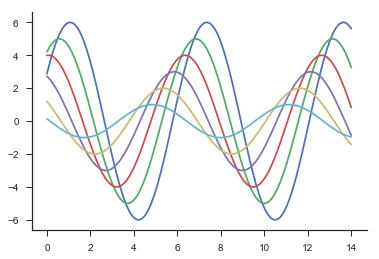

In [15]:
sns.set_style('ticks')
sinplot()

# remove the top and right spines from plot(s)， 默认是对当前的图操作
sns.despine()

Some plots benefits from **`offsetting`** the spines away from the data.

When the ticks don't cover the whole range of the axis, the **`trim`** param will limit the range of the surviving spines.

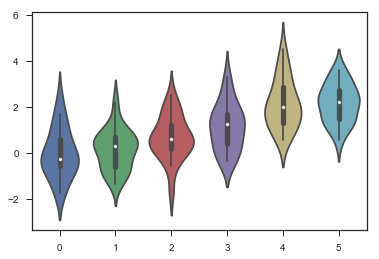

In [16]:
f, ax = plt.subplots()

# Draw a combination of boxplot and kernel density estimate
sns.violinplot(data=data)

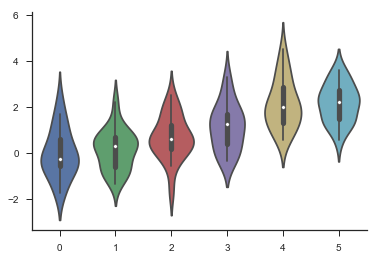

In [17]:
f, ax = plt.subplots()

# Draw a combination of boxplot and kernel density estimate
sns.violinplot(data=data)

sns.despine()

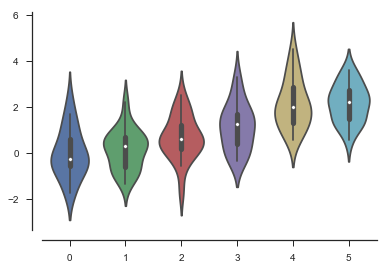

In [18]:
f, ax = plt.subplots()

# Draw a combination of boxplot and kernel density estimate
sns.violinplot(data=data)

sns.despine(offset=10)

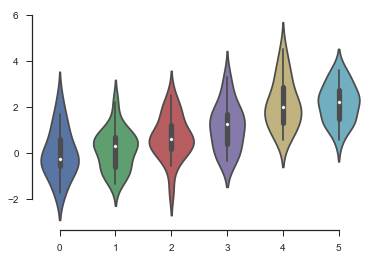

In [19]:
f, ax = plt.subplots()

# Draw a combination of boxplot and kernel density estimate
sns.violinplot(data=data)

sns.despine(trim=True)

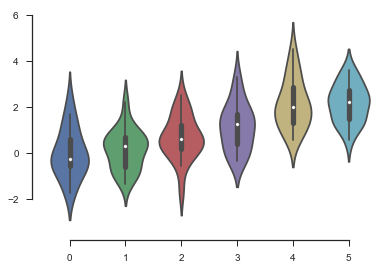

In [20]:
f, ax = plt.subplots()

# Draw a combination of boxplot and kernel density estimate
sns.violinplot(data=data)

sns.despine(offset=10, trim=True)

**Control which spines are removed.**

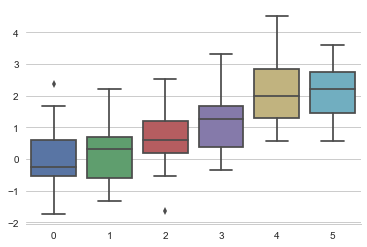

In [21]:
sns.set_style('whitegrid')
sns.boxplot(data=data, palette='deep')  # 改变了颜色
sns.despine(left=True)

## Temporarily(临时地) setting figure style

Although it's easy to switch back and forth(反复地，来回地), u can also **use the `axes_style` func in a `with` statement to temporarily set plot params**. This also allow u to make figures with different-styled axes:

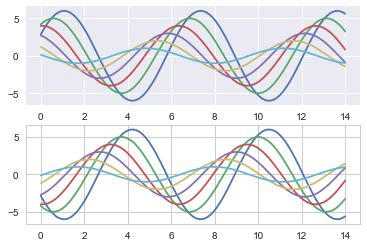

In [22]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

> 第一张图是darkgrid，临时地设置；第二张图是因为上一单元层中设置了whitegrid。

## Overriding elements of the seaborn styles

If u want to **customize the seaborn styles**, u can **pass a dictionary of the `rc` argument of `axes_style()` and `set_style()`**. Note that u can only override the params that are part of the definition through this method. (However, the high-level **`set()` func takes a dictionary of any matplotlib parameters**).

In [23]:
# see what params are included
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

> 在函数`axes_style()`和`set_style()`中只能重写已定义（style definition）的参数。`set()`能设置所有matplotlib中参数。

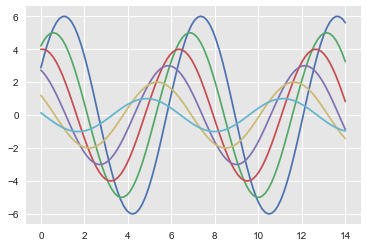

In [24]:
sns.set_style('darkgrid', {'axes.facecolor': ".9"})
sinplot()

## Scaling plot elements

A separate set of params **control the scale of plot elements**, which should let u use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

In [25]:
# reset the default params by calling set()
sns.set()

In [26]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [27]:
sns.plotting_context()

{'axes.labelsize': 11.0,
 'axes.titlesize': 12.0,
 'font.size': 12.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 10.0,
 'lines.linewidth': 1.75,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 10.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 10.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

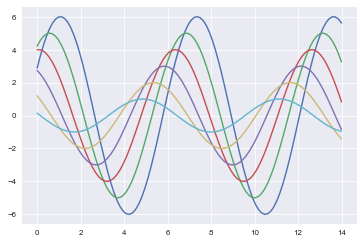

In [28]:
sns.set_context("paper")
sinplot()

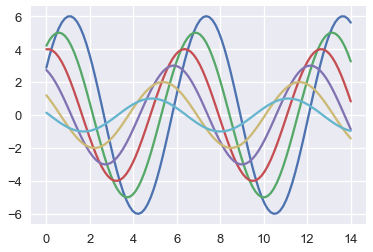

In [29]:
sns.set_context("talk")
sinplot()

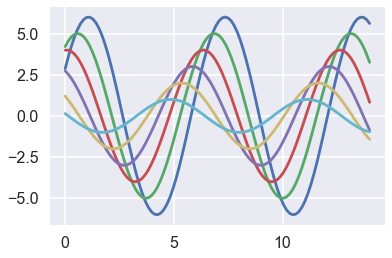

In [30]:
sns.set_context("poster")
sinplot()

You can call `set_context()` with one of these names to set the params, and u can override the params by providing a dictionary of params valus.

You can also independently scale the size of the font of the font elements when changing the context. (This position is also available through the top-level `set()` func).

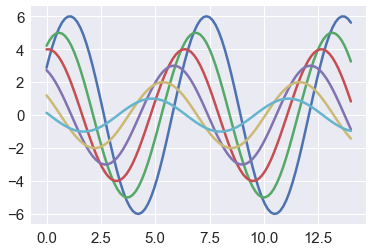

In [31]:
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
sinplot()

同样地，也可以使用`with` statement暂时性地控制嵌套图片的规模。

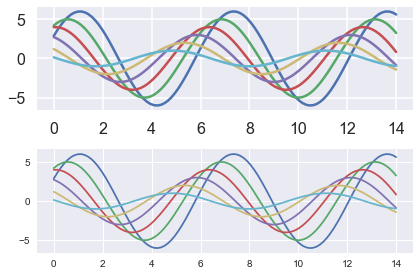

In [32]:
# reset the default params by calling set()
sns.set()

with sns.plotting_context('poster', rc={'lines.linewidth': 2.5}):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot()
plt.tight_layout()  # adjust subplot

通过函数`set()`能快速地配置style和context。这个函数也能设置默认的color palette，但是会被[Color palette](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)中的内容覆盖。